<a href="https://colab.research.google.com/github/js5783/E4511-2021-Shen/blob/main/Curation%26Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

TensorFlow 1.x selected.
--2021-04-05 20:37:48--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m8.929s
user	0m7.386s
sys	0m1.453s
--2021-04-05 20:41:07--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh.1’

install_AMPL_GPU_te 100%[===================>]   1.0

In [ ]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# manipulate data
import pandas as pd

import json
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib_venn as mpv
from scipy.stats import pearsonr

# set up visualization parameters
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set2")
pal = sns.color_palette()
plt.rcParams['figure.figsize'] = [10,10]

pd.set_option('display.max_columns',(90))
pd.set_option('display.max_rows',(20))

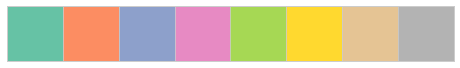

In [ ]:
sns.palplot(pal)

In [ ]:
!pip install molvs

In [ ]:
!pip install bravado

In [ ]:
!pip install umap

In [ ]:
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass, os

In [ ]:
chembl=pd.read_csv("CYP2D6_ChEMBL_SMILES.csv", index_col=0)
dtc=pd.read_csv("CYP2D6_DTC_SMILES.csv", index_col=0)
excape=pd.read_csv("CYP2D6_Excape_SMILES.csv", index_col=0)

In [ ]:
chembl.head()

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM,base_rdkit_smiles
0,CHEMBL4454020,NaN,0.0,426.26,1.0,5.57,17,O=C(O)c1ccc(-n2cc(C(=O)c3c(Cl)cccc3Cl)c3ccccc3...,IC50,NaN,NaN,NaN,NaN,NaN,Not Determined,NaN,NaN,NaN,NaN,NaN,False,CHEMBL4349924,Inhibition of CYP2D6 in human liver microsomes...,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,NaN,Microsomes,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL4346735,1.0,Scientific Literature,Bioorg Med Chem Lett,2019.0,NaN,NaN,NaN,O=C(O)c1ccc(-n2cc(C(=O)c3c(Cl)cccc3Cl)c3ccccc3...
1,CHEMBL1398433,NaN,0.0,369.42,0.0,3.06,SID4238200,COc1ccc(NC(=O)N2CC3(CCN(C(=O)c4ccco4)CC3)C2)cc1,AC50,NaN,NaN,NaN,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN,False,CHEMBL1741321,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7.0,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,COc1ccc(NC(=O)N2CC3(CCN(C(=O)c4ccco4)CC3)C2)cc1
2,CHEMBL1333823,NaN,0.0,344.24,0.0,-1.12,SID4254274,O=C(O)c1nn(-c2ccccc2-c2nnc(O)nc2O)c(=O)[nH]c1=O,AC50,NaN,NaN,NaN,NaN,NaN,inconclusive,NaN,NaN,NaN,NaN,NaN,False,CHEMBL1741321,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7.0,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,O=C(O)c1nn(-c2ccccc2-c2nnc(O)nc2O)c(=O)[nH]c1=O
3,CHEMBL1436024,NaN,0.0,291.35,0.0,3.76,SID4240243,COc1cccc(-c2cc(NCc3ccccc3)ncn2)c1,AC50,'=',12589.25,nM,4.9,NaN,Active,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1741321,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7.0,PubChem BioAssays,NaN,NaN,NaN,NaN,12589.25,COc1cccc(-c2cc(NCc3ccccc3)ncn2)c1
4,CHEMBL1613529,NaN,0.0,310.40,0.0,1.94,SID14740825,Cc1nnc(NC(=O)CCC(=O)NCc2cccs2)s1,AC50,NaN,NaN,NaN,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN,False,CHEMBL1741321,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7.0,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,Cc1nnc(NC(=O)CCC(=O)NCc2cccs2)s1


In [ ]:
# rescue NA pChemblValues
chembl['pChEMBL_Value_nM'] = -np.log10(chembl.Standard_Value_nM/1000000000)


In [ ]:
chembl.head(5)

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM,base_rdkit_smiles,pChEMBL_Value_nM
0,CHEMBL4454020,NaN,0.0,426.26,1.0,5.57,17,O=C(O)c1ccc(-n2cc(C(=O)c3c(Cl)cccc3Cl)c3ccccc3...,IC50,NaN,NaN,NaN,NaN,NaN,Not Determined,NaN,NaN,NaN,NaN,NaN,False,CHEMBL4349924,Inhibition of CYP2D6 in human liver microsomes...,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,NaN,Microsomes,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL4346735,1.0,Scientific Literature,Bioorg Med Chem Lett,2019.0,NaN,NaN,NaN,O=C(O)c1ccc(-n2cc(C(=O)c3c(Cl)cccc3Cl)c3ccccc3...,NaN
1,CHEMBL1398433,NaN,0.0,369.42,0.0,3.06,SID4238200,COc1ccc(NC(=O)N2CC3(CCN(C(=O)c4ccco4)CC3)C2)cc1,AC50,NaN,NaN,NaN,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN,False,CHEMBL1741321,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7.0,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,COc1ccc(NC(=O)N2CC3(CCN(C(=O)c4ccco4)CC3)C2)cc1,NaN
2,CHEMBL1333823,NaN,0.0,344.24,0.0,-1.12,SID4254274,O=C(O)c1nn(-c2ccccc2-c2nnc(O)nc2O)c(=O)[nH]c1=O,AC50,NaN,NaN,NaN,NaN,NaN,inconclusive,NaN,NaN,NaN,NaN,NaN,False,CHEMBL1741321,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7.0,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,O=C(O)c1nn(-c2ccccc2-c2nnc(O)nc2O)c(=O)[nH]c1=O,NaN
3,CHEMBL1436024,NaN,0.0,291.35,0.0,3.76,SID4240243,COc1cccc(-c2cc(NCc3ccccc3)ncn2)c1,AC50,'=',12589.25,nM,4.9,NaN,Active,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1741321,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7.0,PubChem BioAssays,NaN,NaN,NaN,NaN,12589.25,COc1cccc(-c2cc(NCc3ccccc3)ncn2)c1,4.9
4,CHEMBL1613529,NaN,0.0,310.40,0.0,1.94,SID14740825,Cc1nnc(NC(=O)CCC(=O)NCc2cccs2)s1,AC50,NaN,NaN,NaN,NaN,NaN,inactive,NaN,NaN,NaN,NaN,NaN,False,CHEMBL1741321,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,F,BAO_0000019,assay format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7.0,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,Cc1nnc(NC(=O)CCC(=O)NCc2cccs2)s1,NaN


In [ ]:
chembl.Standard_Type.unique()

array(['IC50', 'AC50', 'Inhibition', 'Potency', 'Activity', 'Ki',
       'Drug metabolism', 'INH', 'Vmax', 'IC20', 'Ratio',
       'Control of P-450 marker', 'TDI', 'PPB', 'Kinact', 'FC', 'Km',
       'EC50', 'Ratio IC50', 'Stabilty', 'Compound recovery', 'Stability',
       'CL', 'T1/2', 'Activation', 'mechanism based inhibition',
       'Vmax/Km', 'IC90', 'Partition ratio', 'Drug uptake', 'PB',
       'Retention_time', 'Ks', 'Fm'], dtype=object)

In [ ]:
# select pIC50 values
vals = ['EC50', 'IC50', 'pIC50']
print(chembl.shape)
chembl=chembl[chembl.Standard_Type.isin(vals)]
print(chembl.shape)

(31583, 48)
(6276, 48)


In [ ]:
# drop NA pIC50's & smiles
chembl=chembl.dropna(axis=0, subset = ['pChEMBL_Value_nM','base_rdkit_smiles'])
print(chembl.shape)

(5262, 48)


In [ ]:
# note weird punctuation
chembl.Standard_Relation.unique()

array(["'='", "'>'", "'<'", "'>='", "'<='", nan], dtype=object)

In [ ]:
# flip arrows and fix punctuation for relation column to reflect pValues not normal values
chembl['pRelation'] = chembl.Standard_Relation
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'<'", ">", chembl.pRelation)
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'>'", "<", chembl.pRelation)
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'='", "=", chembl.pRelation)
chembl[['Standard_Relation', 'pRelation']].head()

,Standard_Relation,pRelation
12,'=',=
19,'=',=
30,'>',<
68,'=',=
79,'>',<


In [ ]:
thresh=-np.log10(100/1000000000) # pIC50 of 100nM for threshold

In [ ]:
chembl.head()

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM,base_rdkit_smiles,pChEMBL_Value_nM,pRelation
12,CHEMBL4463477,NaN,0.0,378.52,0.0,2.45,16,CNC(=O)C(=O)NCCCC/C=C\CCCCCCCCCc1nnn[nH]1,IC50,'=',43200.0,nM,4.37,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4416919,Inhibition of human CYP2D6 by fluorescence method,A,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL4414645,1.0,Scientific Literature,J Med Chem,2019.0,NaN,NaN,43200.0,CNC(=O)C(=O)NCCCC/C=C\CCCCCCCCCc1nnn[nH]1,4.364516,=
19,CHEMBL4454552,NaN,0.0,332.40,0.0,4.08,7,CCOc1cccc(CNC(=O)c2ccc(-c3ccncc3)cc2)c1,IC50,'=',240.0,nM,6.62,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4328674,Inhibition of C-terminal 4His-tagged CYP2D6 (u...,A,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL4325872,1.0,Scientific Literature,J Med Chem,2018.0,NaN,NaN,240.0,CCOc1cccc(CNC(=O)c2ccc(-c3ccncc3)cc2)c1,6.619789,=
30,CHEMBL3261481,NaN,0.0,296.37,0.0,1.59,4,O=C1c2cccc3cnn(c23)CCN1[C@@H]1CN2CCC1CC2,IC50,'>',50000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL3268876,Inhibition of CYP2D6 (unknown origin),A,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL3259590,1.0,Scientific Literature,Bioorg. Med. Chem. Lett.,2014.0,NaN,NaN,50000.0,O=C1c2cccc3cnn(c23)CCN1[C@@H]1CN2CCC1CC2,4.301030,<
68,CHEMBL497846,NaN,0.0,301.36,0.0,3.37,15-I,CNC[C@@H]1OCc2ccccc2[C@@H]1Oc1c(C)cccc1F,IC50,'=',310.0,nM,6.51,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL998748,Inhibition of recombinant CYP32D6,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL1156588,1.0,Scientific Literature,Bioorg. Med. Chem. Lett.,2008.0,NaN,NaN,310.0,CNC[C@@H]1OCc2ccccc2[C@@H]1Oc1c(C)cccc1F,6.508638,=
79,CHEMBL3927059,NaN,0.0,302.35,0.0,2.95,BDBM248003,O=C(OCC12CCN(CC1)CC2)c1c[nH]c2ccc(F)cc12,IC50,'>',10000.0,nM,NaN,NaN,432711,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL3889088,Cytochrome P450 Inhibition: Protocol 2: Stock ...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL289,Cytochrome P450 2D6,Homo sapiens,SINGLE PROTEIN,CHEMBL3886940,37.0,BindingDB Database,NaN,2016.0,NaN,NaN,10000.0,O=C(OCC12CCN(CC1)CC2)c1c[nH]c2ccc(F)cc12,5.000000,<


In [ ]:
print(chembl.shape)
chembl_cur = curate_data.aggregate_assay_data(chembl, value_col = 'pChEMBL_Value_nM', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Molecule_ChEMBL_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
print(chembl_cur.shape)
chembl_cur.head()

(5262, 49)
0 entries in input table are missing SMILES strings
4902 unique SMILES strings are reduced to 4901 unique base SMILES strings
(4901, 5)


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL2178250,Cc1cc(NC(=O)c2cnn3cccnc23)c(-c2cccc(Cl)c2)cn1,<,5.000000,0
1,CHEMBL248231,Cc1ccc2c(OCCN3CCN(Cc4ccc5c(c4)N(Cc4ccccc4)C(=O...,,4.823909,0
2,CHEMBL463388,CC1(c2ccc3[nH]ccc3c2)CCNC1,,5.060481,0
3,CHEMBL4470763,CC(C)COc1ncc(-c2cc(F)c(C(=O)NS(C)(=O)=O)cc2F)c...,<,4.301030,0
4,CHEMBL3672841,CCN(c1cc(C#CCN2CCOCC2)cc(C(=O)NCc2c(C)cc(C)[nH...,<,4.000000,0


In [ ]:
chembl_cur.to_csv("/content/drive/MyDrive/Columbia_E4511/CYP2D6_ChEMBL_cur.csv")

In [ ]:
#DTC
dtc.head()

,Compound_ID,Uniprot_ID,Compound_Name,Standard_inchi_key,Max_Phase,Target_Pref_Name,Gene_Names,Target_Class,Wild_type_or_mutant,Mutation_information,PubMed_ID,End_Point_Standard_Type,End_Point_Standard_Relation,End_Point_Standard_Value,End_Point_Standard_Units,Endpoint_Mode_of_Action,Assay_Format,Assay_Type,Assay_Sub_Type,Inhibitor_Type,Detection_Technology,Compound_concentration_value,Compound_concentration_value_units,Substrate_type,Substrate_Type_Standard_Relation,Substrate_Type_Standard_Value,Substrate_Type_Standard_Units,Assay_cell_line,Assay_Description,Activity_Comments,Title,Journal,Year,Volume,Issue,Authors,Annotation_Comments,Assay_ID,DTC_Tid,DTC_Activity_ID,DTC_Molregno,Record_ID,DTC_Document_ID,pDTC_Value,SMILES,base_rdkit_smiles
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P10635,CYTOCHROME P450 2D6,CYP2D6,NaN,NaN,NaN,24015967.0,IC50,>=,33000.0,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inhibition of human CYP2D6,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.481486,CCNC(=O)C[C@H]1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N...,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-...
1,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P10635,CYTOCHROME P450 2D6,CYP2D6,NaN,NaN,NaN,24015967.0,INHIBITION,NaN,NaN,NaN,Not Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Time-dependent inhibition of human CYP2D6,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCNC(=O)C[C@H]1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N...,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-...
2,CHEMBL1593731,AABYLPRACHMDSN-DDKMDXNESA-N,NaN,NaN,P10635,CYTOCHROME P450 2D6,CYP2D6,NaN,NaN,NaN,24015967.0,IC51,>=,33001.0,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.481473,C[C@H]([C@H]1C[C@]1(C)[C@@H](C2=CC=CC=C2)NC(=O...,C[C@@H](C(=O)NCC1CC1)[C@H]1C[C@]1(C)[C@H](NC(=...
3,CHEMBL1593731,AABYLPRACHMDSN-DDKMDXNESA-N,NaN,NaN,P10635,CYTOCHROME P450 2D6,CYP2D6,NaN,NaN,NaN,24015967.0,INHIBITION,NaN,NaN,NaN,Not Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors an...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C[C@H]([C@H]1C[C@]1(C)[C@@H](C2=CC=CC=C2)NC(=O...,C[C@@H](C(=O)NCC1CC1)[C@H]1C[C@]1(C)[C@H](NC(=...
4,CHEMBL1487748,AABYLPRACHMDSN-PVLDIMPDSA-N,NaN,NaN,P10635,CYTOCHROME P450 2D6,CYP2D6,NaN,NaN,NaN,24015967.0,IC52,>=,33002.0,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.481460,C[C@H]([C@@H]1C[C@@]1(C)[C@H](C2=CC=CC=C2)NC(=...,C[C@@H](C(=O)NCC1CC1)[C@@H]1C[C@@]1(C)[C@@H](N...


In [ ]:
# DTC
# select pIC50 values
vals = ['EC50', 'IC50', 'PIC50']
print(dtc.shape)
dtc=dtc[dtc.End_Point_Standard_Type.isin(vals)]
print(dtc.shape)

# flip arrows for relation column to reflect pValues not normal values
dtc['pRelation'] = dtc.End_Point_Standard_Relation
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == "<", ">", dtc.pRelation)
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == ">", "<", dtc.pRelation)
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == "=", "=", dtc.pRelation)
print(dtc.pRelation.unique())
display(dtc[['End_Point_Standard_Relation', 'pRelation']].head())

dtc=dtc.dropna(axis=0, subset = ['pDTC_Value','base_rdkit_smiles'])
print(dtc.shape)

# aggregate duplicates
dtc_cur = curate_data.aggregate_assay_data(dtc, value_col = 'pDTC_Value', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Compound_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
dtc_cur.to_csv("/content/drive/MyDrive/Columbia_E4511/CYP2D6_DTC_cur.csv")
print(dtc_cur.shape)
print(dtc_cur.relation.unique())
dtc_cur.head()

(29667, 46)
(5569, 46)
['>=' '=' nan '<' '>' '<=']


,End_Point_Standard_Relation,pRelation
0,>=,>=
23,=,=
32,NaN,NaN
36,>,<
45,=,=


(4630, 47)
0 entries in input table are missing SMILES strings
3875 unique SMILES strings are reduced to 3875 unique base SMILES strings
(3875, 5)
['' '<' '>']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL248231,Cc1ccc2c(OCCN3CCN(Cc4ccc5c(c4)N(Cc4ccccc4)C(=O...,,4.823909,0
1,CHEMBL2178250,Cc1cc(NC(=O)c2cnn3cccnc23)c(-c2cccc(Cl)c2)cn1,<,5.000000,0
2,CHEMBL463388,CC1(c2ccc3[nH]ccc3c2)CCNC1,,5.060481,0
3,CHEMBL556450,Cc1cnn(C2CCN(c3nc4ccccc4n3Cc3ccc(F)cc3)CC2)c1,,5.272542,0
4,CHEMBL265255,CCc1ccc(-c2ccc(C(=O)N(C)[C@H]3CCN(C(=O)N4CC[C@...,,5.592513,0


In [ ]:
#EXCAPE
excape.head()

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES,base_rdkit_smiles
0,PFNFFQXMRSDOHW-UHFFFAOYNA-N,1103,1565,N,NaN,pubchem,891,9606,CYP2D6,un13,N(CCCCNCCCN)CCCN,NCCCNCCCCNCCCN
1,CJAWPFJGFFNXQI-UHFFFAOYNA-N,107992,1565,N,NaN,pubchem,891,9606,CYP2D6,un13,ClC1=NC(N2CCNCC2)=CN=C1,Clc1cncc(N2CCNCC2)n1
2,JSUAJTLKVREZHV-UHFFFAOYNA-N,5534,1565,N,NaN,pubchem,891,9606,CYP2D6,un13,N1(CCCC1)CC#CCN2CCCC2,C(#CCN1CCCC1)CN1CCCC1
3,RFBVBRVVOPAAFS-UHFFFAOYNA-N,322968,1565,N,NaN,pubchem,891,9606,CYP2D6,un13,O=C1C(N2CCC1CC2)(CO)CO,O=C1C2CCN(CC2)C1(CO)CO
4,BMRGAJCUJCTATP-UHFFFAOYNA-N,96480,1565,N,NaN,pubchem,891,9606,CYP2D6,un13,OC=1C(=NC=CC1)CN2CCCCC2,Oc1cccnc1CN1CCCCC1


In [ ]:
# excape: has no relation col, so create one with all ''
excape['pRelation']=''
print(excape.shape)
print(excape.pRelation.unique())
excape=excape.dropna(axis=0, subset = ['pXC50','base_rdkit_smiles'])
print(excape.shape)
# aggregate duplicates
excape_cur = curate_data.aggregate_assay_data(excape, value_col = 'pXC50', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Original_Entry_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
excape_cur.to_csv("/content/drive/MyDrive/Columbia_E4511/CYP2D6_Excape_cur.csv")
print(excape_cur.shape)
print(excape_cur.relation.unique())
excape_cur.head()

(13332, 13)
['']
(7960, 13)
0 entries in input table are missing SMILES strings
7956 unique SMILES strings are reduced to 7956 unique base SMILES strings
(7956, 5)
['']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL1511412,O=C(Nc1ccccc1)C(Cc1ccccc1)NC(=O)C12CC3CC(CC(C3...,,8.10,1
1,CHEMBL265255,CCc1ccc(-c2ccc(C(=O)N(C)[C@H]3CCN(C(=O)N4CC[C@...,,5.60,0
2,CHEMBL1511690,Nc1n[nH]c(-c2ccc(Br)cc2)c1Cl,,4.95,0
3,CHEMBL2324519,CC(C#N)=C1CCN(c2ccc(N3C[C@H](Cn4ccnn4)OC3=O)cc...,,5.27,0
4,CHEMBL498142,CNC[C@H]1COc2ccccc2[C@H]1Oc1ccccc1C,,6.74,0


In [ ]:
chembl_cur['datasource'] = 'chembl'
dtc_cur['datasource']='dtc'
excape_cur['datasource']='excape'
CYP2D6 = pd.concat([chembl_cur, dtc_cur, excape_cur])
CYP2D6.to_csv("/content/drive/MyDrive/Columbia_E4511/CYP2D6_merge.csv")
print(CYP2D6.shape)

(16732, 6)


In [ ]:
CYP2D6.head()

,compound_id,base_rdkit_smiles,relation,pXC50,active,datasource
0,CHEMBL2178250,Cc1cc(NC(=O)c2cnn3cccnc23)c(-c2cccc(Cl)c2)cn1,<,5.000000,0,chembl
1,CHEMBL248231,Cc1ccc2c(OCCN3CCN(Cc4ccc5c(c4)N(Cc4ccccc4)C(=O...,,4.823909,0,chembl
2,CHEMBL463388,CC1(c2ccc3[nH]ccc3c2)CCNC1,,5.060481,0,chembl
3,CHEMBL4470763,CC(C)COc1ncc(-c2cc(F)c(C(=O)NS(C)(=O)=O)cc2F)c...,<,4.301030,0,chembl
4,CHEMBL3672841,CCN(c1cc(C#CCN2CCOCC2)cc(C(=O)NCc2c(C)cc(C)[nH...,<,4.000000,0,chembl


In [ ]:
CYP2D6.active.value_counts()

0    16212
1      520
Name: active, dtype: int64

In [ ]:
# counting infinity in a particular column name
c = np.isinf(CYP2D6['pXC50']).values.sum()
print("It contains " + str(c) + " infinite values")

It contains 2 infinite values


In [ ]:
## Check for ininity in pXC50 column
CYP2D6_backup = CYP2D6.copy() 
CYP2D6 = CYP2D6.replace([np.inf, -np.inf], np.nan)

In [ ]:
CYP2D6 = CYP2D6[CYP2D6['pXC50'].notna()]

In [ ]:
CYP2D6.isna().sum()

compound_id          0
base_rdkit_smiles    0
relation             0
pXC50                0
active               0
datasource           0
dtype: int64

In [ ]:
CYP2D6.head()

,compound_id,base_rdkit_smiles,relation,pXC50,active,datasource
0,CHEMBL2178250,Cc1cc(NC(=O)c2cnn3cccnc23)c(-c2cccc(Cl)c2)cn1,<,5.000000,0,chembl
1,CHEMBL248231,Cc1ccc2c(OCCN3CCN(Cc4ccc5c(c4)N(Cc4ccccc4)C(=O...,,4.823909,0,chembl
2,CHEMBL463388,CC1(c2ccc3[nH]ccc3c2)CCNC1,,5.060481,0,chembl
3,CHEMBL4470763,CC(C)COc1ncc(-c2cc(F)c(C(=O)NS(C)(=O)=O)cc2F)c...,<,4.301030,0,chembl
4,CHEMBL3672841,CCN(c1cc(C#CCN2CCOCC2)cc(C(=O)NCc2c(C)cc(C)[nH...,<,4.000000,0,chembl


In [ ]:
CYP2D6.to_csv("/content/drive/MyDrive/Columbia_E4511/CYP2D6_merge.csv")

In [ ]:
#Start from here
CYP2D6 = pd.read_csv('CYP2D6_merge.csv')

In [ ]:
import importlib
importlib.reload(curate_data)
CYP2D6_cur = curate_data.aggregate_assay_data(CYP2D6, value_col = 'pXC50', 
                                              id_col = 'compound_id', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'relation',
                                              active_thresh=thresh) 

print(CYP2D6_cur.shape)
print(CYP2D6.relation.unique())
CYP2D6_cur.head()

0 entries in input table are missing SMILES strings
11856 unique SMILES strings are reduced to 11856 unique base SMILES strings
(11856, 5)
['<' '' '>']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL3672841,CCN(c1cc(C#CCN2CCOCC2)cc(C(=O)NCc2c(C)cc(C)[nH...,<,4.000000,0
1,CHEMBL265255,CCc1ccc(-c2ccc(C(=O)N(C)[C@H]3CCN(C(=O)N4CC[C@...,,5.595009,0
2,CHEMBL1511412,O=C(Nc1ccccc1)C(Cc1ccccc1)NC(=O)C12CC3CC(CC(C3...,,8.100000,1
3,CHEMBL1511690,Nc1n[nH]c(-c2ccc(Br)cc2)c1Cl,,4.950000,0
4,CHEMBL2324519,CC(C#N)=C1CCN(c2ccc(N3C[C@H](Cn4ccnn4)OC3=O)cc...,,5.270000,0


In [ ]:
CYP2D6_cur.relation.unique()

array(['<', '', '>'], dtype=object)

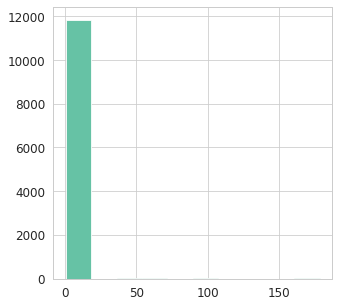

In [ ]:
CYP2D6_cur.pXC50.hist(figsize=(5,5));

In [ ]:
CYP2D6_cur.active.sum()

428

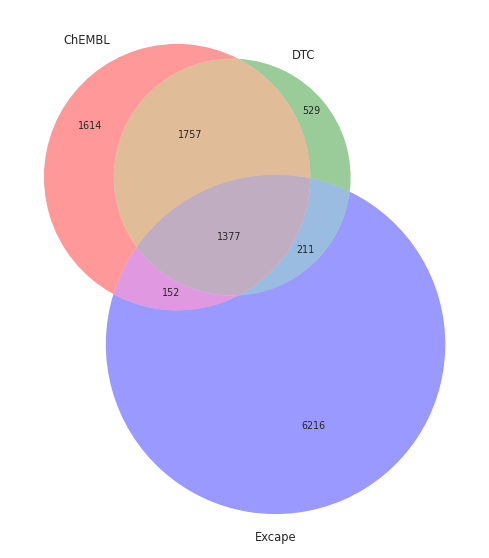

In [ ]:
mpv.venn3([set(CYP2D6.loc[CYP2D6.datasource=='chembl','base_rdkit_smiles']),
           set(CYP2D6.loc[CYP2D6.datasource=='dtc','base_rdkit_smiles']),
           set(CYP2D6.loc[CYP2D6.datasource=='excape','base_rdkit_smiles']),],
          set_labels = ['ChEMBL','DTC','Excape']);

In [ ]:
!pip install Chem

In [ ]:
from rdkit import Chem

2021-04-05 20:43:51,926 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


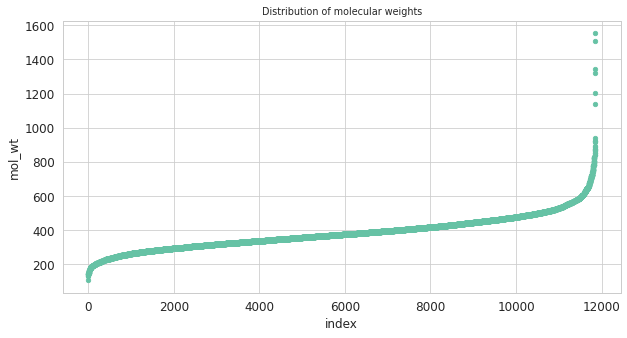

In [ ]:
CYP2D6_cur["mol_wt"] = [Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smile)) for smile in CYP2D6_cur["base_rdkit_smiles"]]
CYP2D6_cur = CYP2D6_cur.sort_values('mol_wt')
CYP2D6_cur=CYP2D6_cur.reset_index(drop=True)
CYP2D6_cur=CYP2D6_cur.reset_index() # plot x axis as index #'s
fig,ax=plt.subplots(figsize=(10,5))
CYP2D6_cur.plot(kind='scatter', x='index', y='mol_wt', ax=ax);
plt.title("Distribution of molecular weights");

In [ ]:
print(CYP2D6_cur.shape)
CYP2D6_cur = CYP2D6_cur[CYP2D6_cur.mol_wt <1400]
print(CYP2D6_cur.shape)

(11856, 7)
(11854, 7)


2021-04-05 20:43:52,388 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


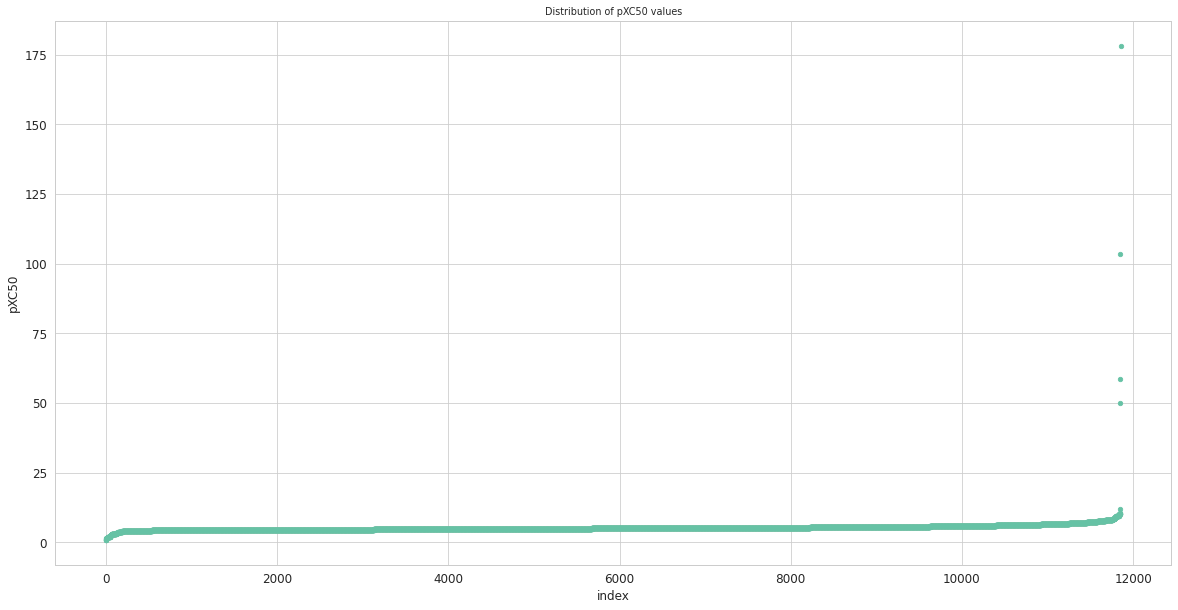

In [ ]:
CYP2D6_cur=CYP2D6_cur.drop(columns=['index'])
CYP2D6_cur = CYP2D6_cur.sort_values('pXC50')
CYP2D6_cur = CYP2D6_cur.reset_index(drop=True)
CYP2D6_cur = CYP2D6_cur.reset_index() # plot x axis as index #'s
fig,ax=plt.subplots(figsize=(20,10))
CYP2D6_cur.plot(kind='scatter', x='index', y='pXC50', ax=ax);
plt.title("Distribution of pXC50 values");

In [ ]:
print(CYP2D6_cur.shape)
CYP2D6_cur=CYP2D6_cur[CYP2D6_cur.pXC50>2]
CYP2D6_cur=CYP2D6_cur[CYP2D6_cur.pXC50<14]
print(CYP2D6_cur.shape)

(11854, 7)
(11804, 7)


In [ ]:
for col in CYP2D6_cur.columns:
  print(col, CYP2D6_cur[col].isna().values.any())

index False
compound_id False
base_rdkit_smiles False
relation False
pXC50 False
active False
mol_wt False


In [ ]:
#Examine diversity

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoDistMat

import umap
from scipy.stats.kde import gaussian_kde
from scipy.cluster.hierarchy import linkage

ndist_max = 1000000

def plot_tani_dist_distr(dataset, smiles_col, dataset_name, **metric_kwargs):
    """
    Generate a density plot showing the distribution of distances between ecfp feature
    vectors, using the tanimoto metric.
    """
    # log = logging.getLogger('ATOM')
    num_cmpds = len(dataset)
    if num_cmpds > 50000:
        log.warning("Dataset has %d compounds, too big to calculate distance matrix" % num_cmpds)
        return

    # log.warning("Starting distance matrix calculation for %d compounds" % num_cmpds)
    feat_type = 'ecfp'
    dist_metric = 'tanimoto'
    smiles_arr1 = dataset[smiles_col].values
    mols1 = [Chem.MolFromSmiles(s) for s in smiles_arr1]
    fprints1 = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in mols1]
    dists = GetTanimotoDistMat(fprints1)

    # log.warning("Finished calculation of %d distances" % len(dists))

    if len(dists) > ndist_max:
        # Sample a subset of the distances so KDE doesn't take so long
        dist_sample = np.random.choice(dists, size=ndist_max)
    else:
        dist_sample = dists

    dist_pdf = gaussian_kde(dist_sample)
    x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
    y_plt = dist_pdf(x_plt)
    fig, ax = plt.subplots(figsize=(8.0,8.0))
    ax.plot(x_plt, y_plt)
    ax.set_xlabel('%s distance' % dist_metric)
    ax.set_ylabel('Density')
    ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
                  dataset_name, dist_metric, feat_type))
    return dists

In [ ]:
sns.set_context('poster')


array([0.92307692, 0.95774648, 0.84931507, ..., 0.92405063, 0.88607595,
       0.85333333])

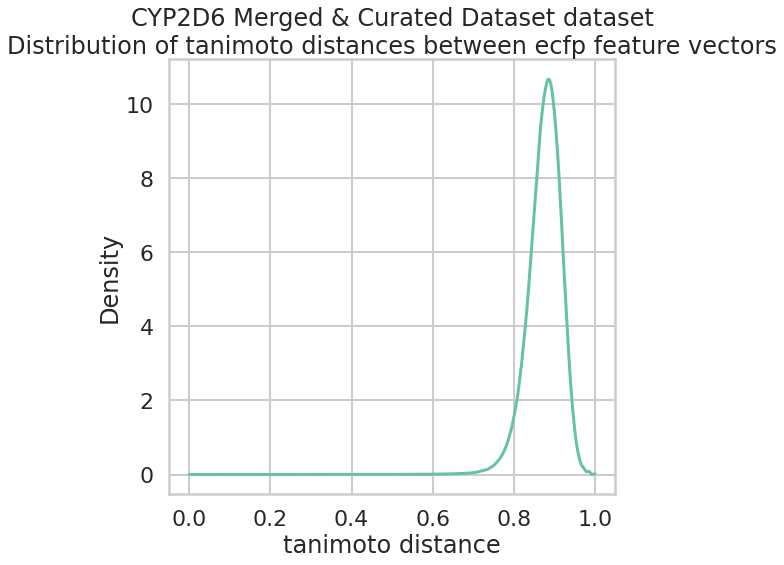

In [ ]:
plot_tani_dist_distr(CYP2D6_cur, 'base_rdkit_smiles', 'CYP2D6 Merged & Curated Dataset')

In [ ]:
CYP2D6_cur = CYP2D6_cur.drop('index',axis=1)

In [ ]:
CYP2D6_cur = CYP2D6_cur.reset_index(drop=True)

In [ ]:
CYP2D6_cur.head()

,compound_id,base_rdkit_smiles,relation,pXC50,active,mol_wt
0,CHEMBL245412,C/C1=C\CC(C)(C)/C=C/C(=O)/C(C)=C/CC1,,2.027809,0,218.167065
1,CHEMBL1419469,Cc1ccccc1NC(=O)Cc1c(O)nc2ccccc2c1O,,2.050000,0,308.116092
2,CHEMBL1093607,CC(c1c(CCN(C)C)sc2ccccc12)n1ccnc1,,2.097506,0,299.145619
3,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,,2.233919,0,193.089149
4,CHEMBL1091782,C[C@@H](c1cscn1)c1c(CCN(C)C)sc2ccccc12,,2.308753,0,316.106791


In [ ]:
CYP2D6_cur.to_csv("/content/drive/MyDrive/Columbia_E4511/CYP2D6_cur.csv")

In [ ]:
!pip uninstall umap

In [ ]:
pip install umap-learn 

In [ ]:
pip install --ignore-installed llvmlite


  Using cached https://files.pythonhosted.org/packages/54/25/2b4015e2b0c3be2efa6870cf2cf2bd969dd0e5f937476fc13c102209df32/llvmlite-0.36.0-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
import umap

In [ ]:
dp.diversity_plots('/content/drive/MyDrive/Columbia_E4511/CYP2D6_cur.csv', 
                   datastore = False,
                   id_col ='compound_id', 
                   smiles_col = 'base_rdkit_smiles', 
                   is_base_smiles=True, 
                   response_col = 'pXC50')

Computing fingerprints...
Done
Computing Tanimoto distance matrix...
Done


AttributeError: ignored

In [ ]:
dp.diversity_plots('/content/drive/MyDrive/Columbia_E4511/CYP2D6_cur.csv', 
                   datastore = False,
                   id_col ='compound_id', 
                   smiles_col = 'base_rdkit_smiles', 
                   is_base_smiles=True, 
                   response_col = 'pXC50',
                   ecfp_radius = 2)

In [ ]:
dp.diversity_plots('/content/drive/MyDrive/Columbia_E4511/CYP2D6_cur.csv', 
                   datastore = False,
                   id_col ='compound_id', 
                   smiles_col = 'base_rdkit_smiles', 
                   is_base_smiles=True, 
                   response_col = 'pXC50',
                   ecfp_radius = 6)